In [2]:
import matplotlib
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(16)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

filename = '/content/drive/MyDrive/MyLecture/2022/CS2022/0413/diabetes.csv'
df = pd.read_csv(filename)
print(df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31  

In [4]:
# 처음 5줄을 봅니다.
print(df.head(5))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [5]:
# 데이터의 전반적인 정보를 확인해 봅니다.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [6]:
# 각 정보별 특징을 좀더 자세히 출력합니다.
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [9]:
X = df.loc[:, df.columns != 'Outcome']
y = df.loc[:, 'Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
# 딥러닝을 구동하는 데 필요한 케라스 함수를 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 필요한 라이브러리를 불러옵니다.
import numpy
import tensorflow as tf

# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다.
numpy.random.seed(3)
tf.random.set_seed(3)

In [11]:
# 모델을 설정합니다.
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [12]:
# 모델을 실행합니다.
model.fit(X_train, y_train, epochs=50, batch_size=10)

# 결과를 출력합니다.
print("\n Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/50
62/62 [==============================] - 1s 2ms/step - loss: 12.0454 - accuracy: 0.6336
Epoch 2/50
62/62 [==============================] - 0s 3ms/step - loss: 7.2297 - accuracy: 0.6303
Epoch 3/50
62/62 [==============================] - 0s 2ms/step - loss: 4.4193 - accuracy: 0.5228
Epoch 4/50
62/62 [==============================] - 0s 3ms/step - loss: 2.7779 - accuracy: 0.5114
Epoch 5/50
62/62 [==============================] - 0s 3ms/step - loss: 1.7390 - accuracy: 0.5081
Epoch 6/50
62/62 [==============================] - 0s 3ms/step - loss: 1.0308 - accuracy: 0.5375
Epoch 7/50
62/62 [==============================] - 0s 3ms/step - loss: 0.8409 - accuracy: 0.5570
Epoch 8/50
62/62 [==============================] - 0s 2ms/step - loss: 0.8069 - accuracy: 0.5489
Epoch 9/50
62/62 [==============================] - 0s 3ms/step - loss: 0.7824 - accuracy: 0.5521
Epoch 10/50
62/62 [==============================] - 0s 2ms/step - loss: 0.7444 - accuracy: 0.5798
Epoch 11/50
62/62 

In [13]:
model.save("model.h5")

In [14]:
from keras.models import load_model
 
# load model
model = load_model('model.h5')
# summarize model.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_ss = scaler.transform(X)

In [17]:
X_ss

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size=0.2)

In [20]:
# 모델을 실행합니다.
model.fit(X_train, y_train, epochs=50, batch_size=10)

# 결과를 출력합니다.
print("\n Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/50
62/62 [==============================] - 1s 3ms/step - loss: 0.5765 - accuracy: 0.6661
Epoch 2/50
62/62 [==============================] - 0s 3ms/step - loss: 0.5402 - accuracy: 0.6710
Epoch 3/50
62/62 [==============================] - 0s 3ms/step - loss: 0.5241 - accuracy: 0.6775
Epoch 4/50
62/62 [==============================] - 0s 3ms/step - loss: 0.5157 - accuracy: 0.6743
Epoch 5/50
62/62 [==============================] - 0s 3ms/step - loss: 0.5082 - accuracy: 0.6873
Epoch 6/50
62/62 [==============================] - 0s 3ms/step - loss: 0.5022 - accuracy: 0.7020
Epoch 7/50
62/62 [==============================] - 0s 3ms/step - loss: 0.4979 - accuracy: 0.7068
Epoch 8/50
62/62 [==============================] - 0s 3ms/step - loss: 0.4928 - accuracy: 0.7134
Epoch 9/50
62/62 [==============================] - 0s 3ms/step - loss: 0.4890 - accuracy: 0.7166
Epoch 10/50
62/62 [==============================] - 0s 3ms/step - loss: 0.4853 - accuracy: 0.7264
Epoch 11/50
62/62 [

In [21]:
model.predict(X_test)

array([[2.09520757e-02],
       [7.61704803e-01],
       [3.53735685e-03],
       [6.12223506e-01],
       [5.32934070e-01],
       [4.02075410e-01],
       [8.65128338e-02],
       [7.69674778e-04],
       [1.55015260e-01],
       [1.87880099e-02],
       [5.04297078e-01],
       [2.46935219e-01],
       [2.14865774e-01],
       [7.13895559e-01],
       [8.14059019e-01],
       [1.34229660e-04],
       [4.38266098e-02],
       [9.93162394e-04],
       [6.93250835e-01],
       [5.30613601e-01],
       [7.19712675e-02],
       [1.52876675e-02],
       [2.26612478e-01],
       [4.47619051e-01],
       [3.14536691e-03],
       [7.92837262e-01],
       [2.11202413e-01],
       [6.39818907e-02],
       [5.02453804e-01],
       [2.21155137e-01],
       [7.84484029e-01],
       [1.60540015e-01],
       [9.61694121e-02],
       [1.10516548e-02],
       [5.02641678e-01],
       [9.03165638e-02],
       [2.05148101e-01],
       [3.49510193e-01],
       [4.39874291e-01],
       [6.76950157e-01],


In [22]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("/content/model.h5",             # file명을 지정합니다
                             monitor='val_loss',   # val_loss 값이 개선되었을때 호출됩니다
                             verbose=1,            # 로그를 출력합니다
                             save_best_only=True,  # 가장 best 값만 저장합니다
                             mode='auto'           # auto는 알아서 best를 찾습니다. min/max
                            )

earlystopping = EarlyStopping(monitor='val_loss',  # 모니터 기준 설정 (val loss) 
                              patience=10,         # 10회 Epoch동안 개선되지 않는다면 종료
                             )

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, 
      validation_data=(X_test, y_test),
      epochs=200, 
      batch_size=30, 
      callbacks=[checkpoint, earlystopping], # checkpoint, earlystopping 콜백
     )

Epoch 1/200
 1/21 [>.............................] - ETA: 9s - loss: 0.3712 - accuracy: 0.8333
Epoch 1: val_loss improved from inf to 0.50687, saving model to /content/model.h5
21/21 [==============================] - 1s 12ms/step - loss: 0.4244 - accuracy: 0.7850 - val_loss: 0.5069 - val_accuracy: 0.7468
Epoch 2/200
 1/21 [>.............................] - ETA: 0s - loss: 0.3104 - accuracy: 0.9000
Epoch 2: val_loss improved from 0.50687 to 0.50682, saving model to /content/model.h5
21/21 [==============================] - 0s 4ms/step - loss: 0.4217 - accuracy: 0.7818 - val_loss: 0.5068 - val_accuracy: 0.7532
Epoch 3/200
 1/21 [>.............................] - ETA: 0s - loss: 0.4583 - accuracy: 0.7333
Epoch 3: val_loss improved from 0.50682 to 0.50511, saving model to /content/model.h5
21/21 [==============================] - 0s 5ms/step - loss: 0.4203 - accuracy: 0.7785 - val_loss: 0.5051 - val_accuracy: 0.7468
Epoch 4/200
 1/21 [>.............................] - ETA: 0s - loss: 0.44

Best Accuray on Test Set = 0.7532467246055603


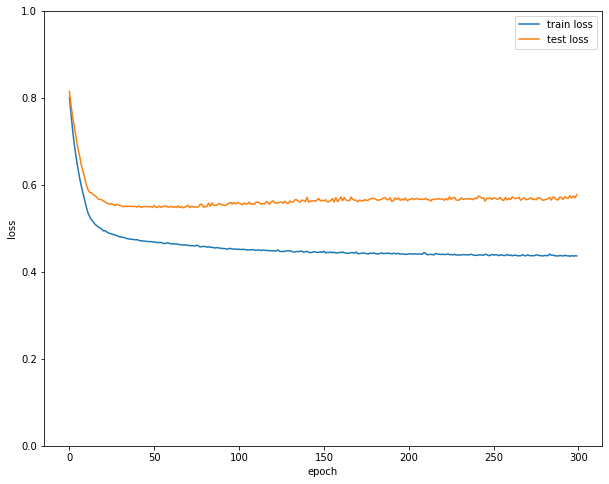

In [26]:
# define the keras model with l2 regularization with lambda = 0.01
from keras.regularizers import l2
model = Sequential()
model.add(Dense(8, input_dim=8, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model using training set while evaluationg on test set
history=model.fit(X_train, y_train, batch_size = 10, epochs = 300, validation_data=(X_test, y_test), verbose=0)

# plot training error and test error
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0,1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc='upper right')
# print the best accuracy reached on the test set
print("Best Accuray on Test Set =", max(history.history['val_accuracy']))

Best Accuray on Test Set = 0.5974025726318359


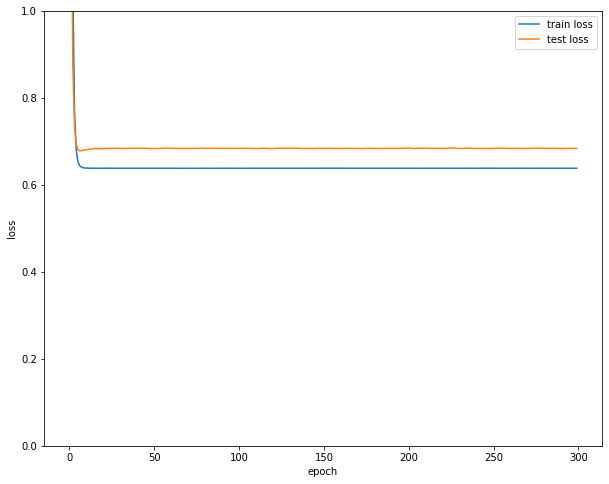

In [25]:
# define the keras model with l2 regularization with lambda = 0.5
from keras.regularizers import l2
model = Sequential()
model.add(Dense(8, input_dim=8, activation='relu', kernel_regularizer=l2(0.5)))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.5)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model using training set while evaluationg on test set
history=model.fit(X_train, y_train, batch_size = 10, epochs = 300, validation_data=(X_test, y_test), verbose=0)

# plot training error and test error
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0,1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc='upper right')
# print the best accuracy reached on the test set
print("Best Accuray on Test Set =", max(history.history['val_accuracy']))

Best Accuray on Test Set = 0.7662337422370911


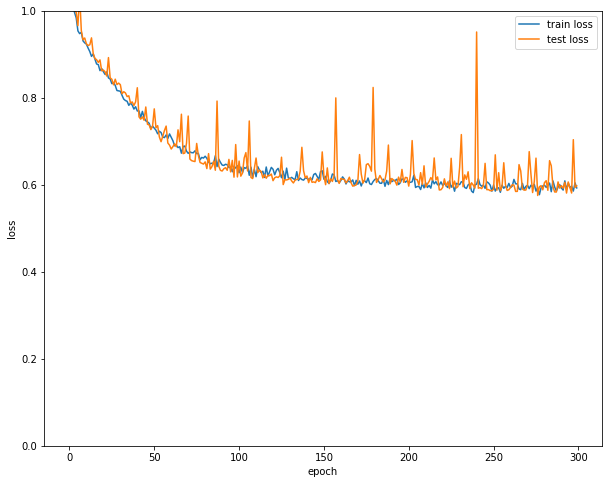

In [ ]:
# 5
# set up a seed for random number generator so the result will be reproducible
numpy.random.seed(seed)

# define the keras model with l1 regularization with lambda = 0.01
from keras.regularizers import l1
model = Sequential()
model.add(Dense(8, input_dim=8, activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dense(8, activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model using training set while evaluationg on test set
history=model.fit(X_train, y_train, batch_size = 10, epochs = 300, validation_data=(X_test, y_test), verbose=0)

# plot training error and test error
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0,1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc='upper right')
# print the best accuracy reached on the test set
print("Best Accuray on Test Set =", max(history.history['val_accuracy']))

Best Accuray on Test Set = 0.7705627679824829


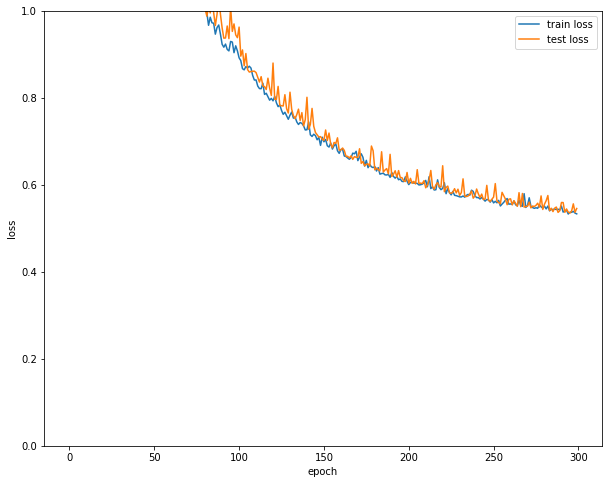

In [ ]:
# define the keras model with l1_l2 regularization with l1_ambda = 0.01 and l2_ambda = 0.1
from keras.regularizers import l1_l2
model = Sequential()
model.add(Dense(8, input_dim=8, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.1)))
model.add(Dense(8, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model using training set while evaluationg on test set
history=model.fit(X_train, y_train, batch_size = 10, epochs = 300, validation_data=(X_test, y_test), verbose=0)
 
# plot training error and test error
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0,1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc='upper right')
# print the best accuracy reached on the test set
print("Best Accuray on Test Set =", max(history.history['val_accuracy']))